<a href="https://colab.research.google.com/github/adilsong3/DataScience_Academy/blob/master/Data_Science_Job_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Analise dos Salários de Profissões na **Área de Dados**

O [Kaggle](https://www.kaggle.com/) é uma das maiores comunidades online de cientistas de dados e profissionais de aprendizado de máquina. 

* Nessa comunidade você consegue disponibilizar e usufruir de datasets corporativo com fins didaticos e também particapar de competições com **premiações que chegam em $50.000**.  

<br>

<img src="https://iconape.com/wp-content/files/rl/179596/svg/kaggle-seeklogo.com.svg" alt="drawing" width="100"/>

<br>

##Obtenção de dados
**Nesse notebook, iremos analisar os salários em um dataset vindo dessa comunidade descrita acima.**
* Base de dados que será utilizada no Kaggle ([Data Science Job Salaries](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries?select=ds_salaries.csv))
* Utilizaremos os dados da base ds_salaries.csv

<img src="https://img.freepik.com/fotos-gratis/equipe-de-corretores-estao-conversando-em-um-escritorio-escuro-com-telas-analisando-dados-graficos-e-relatorios-para-fins-de-investimento-comerciantes-de-trabalho-em-equipe-criativa_146671-15017.jpg?w=900&t=st=1662902336~exp=1662902936~hmac=8848b910939c3c892fab3c8c9697ffa46aed1743aec7c71b5e2030c49eb54a72" alt="drawing" width="1000"/>

In [3]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("ds_salaries.csv")

# **Análise dos Dados**
Essa etapa tem como objetivo se relacionar com os dados, se você não sabe o tipo de dados que está lidando esse é o momento para fazer a exploração inicial e conhecer os dados brutos.

* Primeiro vamos identificar cada coluna e colocar seu significado ao lado para uma melhor interpretação dos dados no futuro, seja para você ou para um terceiro se achar na sua analise.
<br>

**Dicionário das variáveis**

* **work_year -** O ano em que o salário foi pago.
* **experience_level -** O nível de experiência no cargo: 
  - EN = "Nível Junior"
  - MI = "Nível Pleno"
  - SE = "Nível Sênior"
  - EX = "Nível Executivo/Diretor".
* **employment_type	-** O tipo de emprego para a função: 
  - PT = Part-time 
  - FT = Full-time 
  - CT = Contract 
  - FL = Freelance
* **job_title	-** Cargo
* **salary -** Salário bruto
* **salary_currency	-** Moeda
* **salaryinusd -**  Salario convertido em USD
* **employee_residence -** Onde morava enquanto trabalhou na empresa
* **remote_ratio -** Tempo de trabalho remoto:
  - 0 = Não trabalha remoto
  - 50 = Parcialmente remoto
  - 100 = Totalmente remoto
* **company_location -** País da sede da empresa
* **company_size -** O número de trabalhadores:
  - S = abaixo de 50 funcionarios (Pequena)
  - M = entre 50 e 250 funcionarios (Média)
  - L = acima de 250 funcionarios (Grande)

<br>
Para conseguir chegar ao seu objetivo na analise exploratória de dados primeiro precisamos definir o que queremos descobrir, quais são nossas dúvidas. Se não pensarmos antes de iniciar a analise apenas será um monte de linhas de código sem uma direção.  

<br>


## **Dividindo a análise por perguntas:**

1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?
2. Qual a porcentagem de valores ausentes no dataset?
3. Qual o tipo de distribuição das variáveis?
4. Há outliers presentes?
5. Qual a média dos salários?
6. Qual a média salarial por cargo?
7. TOP 3 países com as maiores médias de salário.
8. A média salarial mais alta está relacionada ao nível do profissional?
9. Qual a média salarial por ano?
10. Quem trabalha presencialmente recebe um salario maior do que quem trabalha remoto?
11. Quanto ganha um Principal Data Scientist que trabalha freelancer?
12. Qual tipo de contrato paga o maior salário para Data Scientist?
13. Qual tipo de contrato paga o maior salário para Data Engineer?
14. Gráfico com o TOP 10 cargo com maior número de pessoas.

Será finalizado com uma breve conclusão.


## **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
* Aqui o objetivo é descobrir o tamanho do nosso dataframe, procurar saber quantos entradas (linhas) e quantas variaveis (colunas) nosso DF (dataframe) possui.
* Logo de inicio vemos 1620 entradas (linhas) e 16 variaveis (colunas).

In [5]:
# identificar o volume de dados do DataFrame
print(f'Entradas: {df.shape[0]}')
print(f'Variaveis: {df.shape[1]}\n')

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas: 607
Variaveis: 12



Unnamed: 0             int64
work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

## **Q2. Qual a porcentagem de valores ausentes no dataset?**
O objetivo com a analise a seguir é verificar quais valores estão ausentes e com isso verificar a possibilidade de trata-los ou retiralos da nossa analise.

* Verificamos abaixo que o dataset não possui valores ausentes.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Unnamed: 0            0.0
work_year             0.0
experience_level      0.0
employment_type       0.0
job_title             0.0
salary                0.0
salary_currency       0.0
salary_in_usd         0.0
employee_residence    0.0
remote_ratio          0.0
company_location      0.0
company_size          0.0
dtype: float64

## **Q3. Qual o tipo de distribuição das variáveis?**
O objetivo abaixo é plotar gráficos de histogramas, para analisarmos como está a distribuição dos dados.

* Concluimos com a analise dos histrogramas acima que algumas variaveis como: salary e salary_in_usd não possuem uma distribuição aceitavel, podem conter alguns outliers?
  - Obs: Nessa analise vamos trabalhar apenas com a coluna salary_in_usd


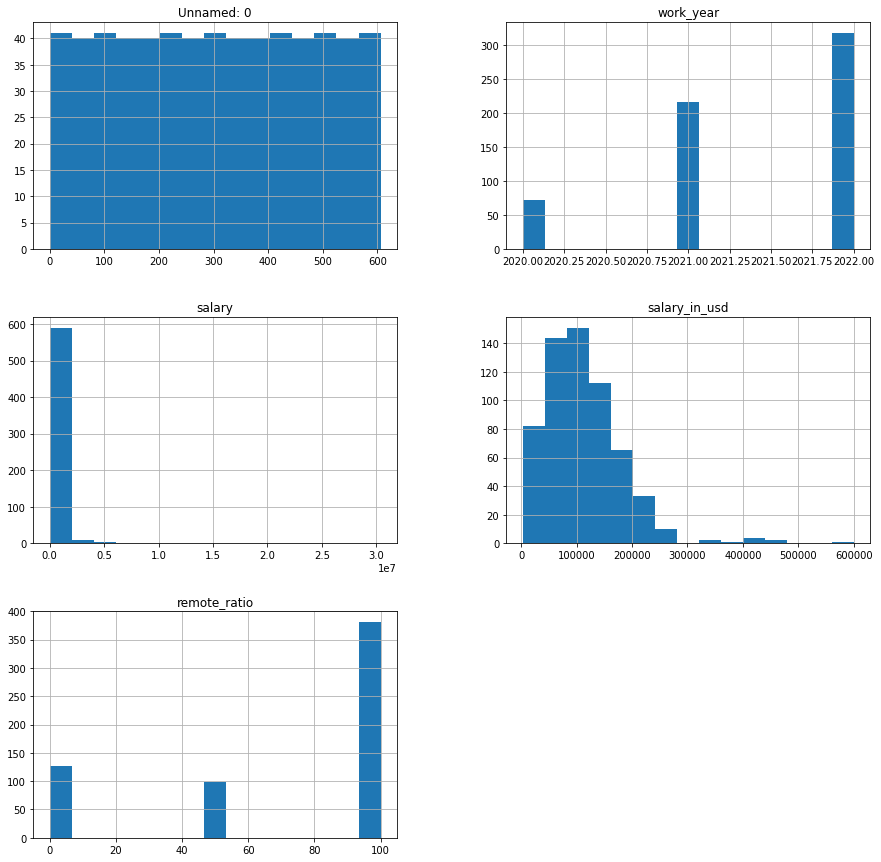

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15, 15))

plt.show()

## **Q4. Há outliers presentes?**
Após a analise acima vemos que alguns gráficos como salary e remote_ratio estão com uma distribuição fora da normalidade, utilizaremos duas formas para verificar os outliers:

* Resumo estátistico utilizando describe.
* Plotar gráficos utilizando boxplot para variaveis.

In [8]:
# Criando uma lista de variaveis onde iremos analisas separadamente do Data Frame
variaveis = ['salary', 'salary_in_usd', 'remote_ratio']

# Analisando apenas as variaveis que escolhemos para fazer o resumo estatistico
df[variaveis].describe()

,salary,salary_in_usd,remote_ratio
count,6.070000e+02,607.000000,607.00000
mean,3.240001e+05,112297.869852,70.92257
std,1.544357e+06,70957.259411,40.70913
min,4.000000e+03,2859.000000,0.00000
25%,7.000000e+04,62726.000000,50.00000
50%,1.150000e+05,101570.000000,100.00000
75%,1.650000e+05,150000.000000,100.00000
max,3.040000e+07,600000.000000,100.00000


Após fazer um describe das variaveis selecionadas, verificamos em numero que possuem outliers.
* Será que tem cientistas de dados que recebem **apenas 2.859 dolares por ano**, sendo que a média é 101.570?

## **Boxplot salary_in_usd**
* Verificamos também 10 com um percentual de **1.65%**, onde ganham mais de 300 mil dolares por ano.
* Verificamos ao plotar o gráfico que existem poucos outliers cerca de 21 com um percentual de aproximadamente **1.98%**, onde ganham menos de 10 mil dolares por ano.

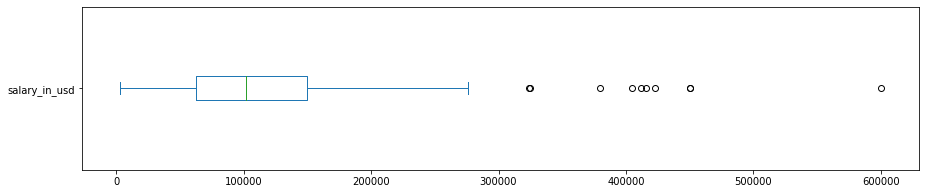

salary_in_usd: Salários acima de 300 mil
Entradas: 10
Percentual: 1.65%

salary_in_usd: Salários abaixo de 10 mil
Entradas: 12
Percentual: 1.98%


In [9]:
# minimum_nights
df.salary_in_usd.plot(kind="box", vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("salary_in_usd: Salários acima de 300 mil")
print(f"Entradas: {len(df[df.salary_in_usd > 300000])}")
print(f"Percentual: {round((len(df[df.salary_in_usd > 300000]) / df.shape[0]) * 100, 2)}%")

print("\nsalary_in_usd: Salários abaixo de 10 mil")
print(f"Entradas: {len(df[df.salary_in_usd < 10000])}")
print(f"Percentual: {round((len(df[df.salary_in_usd < 10000]) / df.shape[0]) * 100, 2)}%")

## **Histrograma sem outliers**
* Chegamos a um ponto onde iremos limpar os dados extremos para ter uma analise mais acertiva.
* Logo após a limpeza vemos a distruição que anteriormente parecia não existir bem visivel.
* Foi feito uma cópia do dataframe para evitar problemas futuros, nessa cópia foi retirada a coluna "neighbourhood" e também os outliers antes descobertos.

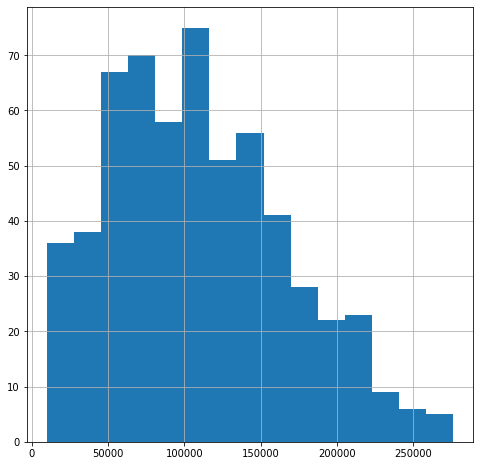

In [10]:
# Criando uma copia do dataframe e removendo os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[(df_clean.salary_in_usd > 300000) | (df_clean.salary_in_usd < 10000)].index, axis=0, inplace=True)

# Excluindo a coluna salary, visto que estamos trabalhando com a USD
df_clean.drop("salary", axis=1, inplace=True)

# plotar o histograma das variáveis numéricas sem os outliers
df_clean.salary_in_usd.hist(bins=15, figsize=(8, 8))

plt.show()

## **Q5. Qual a média dos salários?**

In [11]:
# Ver a média pela coluna salary_in_usd
print(f"Média dos salários: {df_clean.salary_in_usd.mean()}")

Média dos salários: 109243.4


## **Q6. Qual a média salarial por cargo**
* O cargo de **Principal Data Engineer** está com o maior média salárial de **192500** logo atrás do **Principal Data Scientist** com **181782**

In [12]:
# a média salarial por cargo em ordem do maior para o menor
df_clean.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False)

job_title
Principal Data Engineer                     192500.000000
Principal Data Scientist                    181782.833333
Data Architect                              177873.909091
Analytics Engineer                          175000.000000
Director of Data Science                    173419.666667
Data Specialist                             165000.000000
Head of Data                                160162.600000
Machine Learning Scientist                  158412.500000
Data Science Manager                        158328.500000
Director of Data Engineering                156738.000000
Head of Data Science                        146718.750000
Lead Data Engineer                          139724.500000
Data Analytics Manager                      127134.285714
Cloud Data Engineer                         124647.000000
Applied Data Scientist                      124568.750000
Data Engineering Manager                    123227.200000
Principal Data Analyst                      122500.000000
ML E

## **Q7. TOP 3 paises com as maiores médias de salário**
* Vemos em 1º lugar o Estados Unidos pagando **276000**, em 2º está Japão pagando **260000** e em 3º Russia pagando **230000**

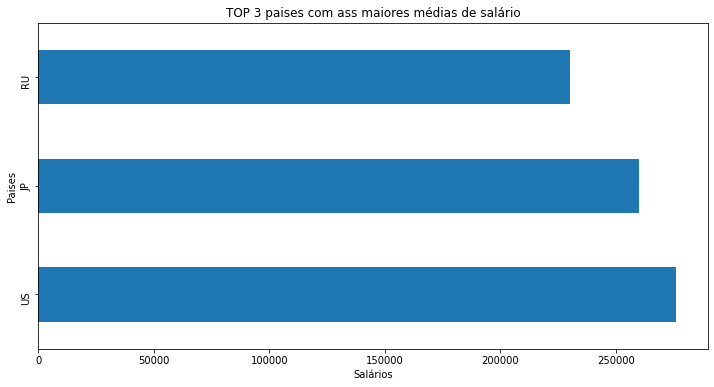

In [13]:
# tamanho do grafíco
plt.figure(figsize=(12, 6))

# titulo do gráfico
plt.title("TOP 3 países com ass maiores médias de salário")

# agrupando por país e pegando os maiores salários.
df_clean.groupby("company_location")["salary_in_usd"].max().sort_values(ascending=False)[0:3].plot(kind="barh", rot=90)

# Nome que vai para o eixo X
plt.xlabel("Salários")

# Nome que vai para o eixo Y
plt.ylabel("Paises")
plt.show()

## **Q8. A média salarial mais alta está relacionada ao nível do profissional?**
Salários por nível com base na análise:
* EX (Nível Executivo/Director) = **159963**
* SE (Nível Sênior) = **135797**
* MI (Nível Pleno) = **85609**
* EN (Nível Junior) = **64984**

<br>

Sim, com base na analise vemos que, **quanto mais experiência** o profissional tem, maior serão os salários.

In [14]:
# agrupando por nível de experiencia e tirando a média salarial
df_clean.groupby("experience_level")["salary_in_usd"].mean().sort_values(ascending=False)

experience_level
EX    159963.318182
SE    135797.263538
MI     85609.236453
EN     64984.084337
Name: salary_in_usd, dtype: float64

## **Q9. Qual a média salarial por ano?**
* No **ano de 2022** até o momento foi registrado uma média salarial de **122187**
* Vemos **um crescimento de mais de 39%** na média salarial do em 2 anos.

In [15]:
# agrupando por ano e tirando a média dos salários
df_clean.groupby(["work_year"])["salary_in_usd"].mean().sort_values(ascending=False)

work_year
2022    122187.295238
2021     96257.102439
2020     87472.076923
Name: salary_in_usd, dtype: float64

## **Q10. Quem trabalha presencialmente recebe um salario maior do que quem trabalha remoto?**
- 0 = Não trabalha remoto
- 50 = Parcialmente remoto
- 100 = Totalmente remoto

<br>

Nesse dataset que estamos trabalhando a média salarial para quem **trabalha remoto** está **9% acima** do que quem trabalha presencialmente e **47% acima** de quem trabalha híbrido.

In [16]:
df_clean.groupby("remote_ratio")["salary_in_usd"].mean().sort_values(ascending=False)

remote_ratio
100    117396.387534
0      107675.685950
50      79572.252632
Name: salary_in_usd, dtype: float64

## **Q11. Quanto ganha um Data Scientist que trabalha freelancer?**
* No dataset **só tem 1 registro** de freelancer Data Scientist e o salário é de **100000**

In [17]:
# filtrando o dataset para quem trabalha como freelancer == FL
# filtrando para quem trabalha como Data Scientist e puxando a média salarial
df_clean[(df_clean["employment_type"] == "FL") & (df_clean["job_title"] == "Data Scientist")]["salary_in_usd"].mean()

100000.0

## **Q12. Qual tipo de contrato paga o maior salário para Data Scientist?**
  - PT = Part-time 
  - FT = Full-time  
  - FL = Freelance

<br>

O **contrato Full-time** para Cientistas de Dados ou areas afins, nesse dataset apresenta a **maior média salarial** pagando **115276**


In [18]:
# criando uma lista com os cargos relacionados a dados e cientista
cargo_scientist = [
    "Director of Data Science",
    "Princial Data Scientist", 
    "Data Scientist",
    "Data Science Manager",
    "Data Science Engineer"
]

# criando um dataset filtrado apenas pelos cargos acima
data_scientist = df_clean[df_clean["job_title"].isin(cargo_scientist)]

# agrupando por tipo de contrato e tirando a média salarial
data_scientist.groupby("employment_type")["salary_in_usd"].mean().sort_values(ascending=False)

employment_type
FT    115276.00641
FL    100000.00000
PT     60834.50000
Name: salary_in_usd, dtype: float64

## **Q13. Qual tipo de contrato paga o maior salário para Data Engineer?**
  - PT = Part-time 
  - FT = Full-time  
  - FL = Freelance

<br>

O **contrato Full-time** para Engenheiro de Dados ou areas afins, nesse dataset apresenta a **maior média salarial** pagando **108532**

In [19]:
# criando uma lista com os cargos relacionados a dados e engenharia
cargo_engineer = [
    "Princial Data Engineer", 
    "Data Engineer", 
    "Data Science Engineer", 
    "Data Analytics Engineer", 
    "Big Data Engineer", 
    "Lead Machine Learning Engineer",
    "Machine Learning Engineer",
    "Data Engineering Manager",
    "Director of Data Engineering"
]

# criando um dataset filtrado apenas pelos cargos acima
data_engineer = df_clean[df_clean["job_title"].isin(cargo_engineer)]

# agrupando por tipo de contrato e tirando a média salarial
data_engineer.groupby("employment_type")["salary_in_usd"].mean().sort_values(ascending=False)

employment_type
FT    108532.363158
PT     62349.000000
FL     20000.000000
Name: salary_in_usd, dtype: float64

## **Q14. Gráfico com o TOP 10 cargo com maior número de pessoas?**

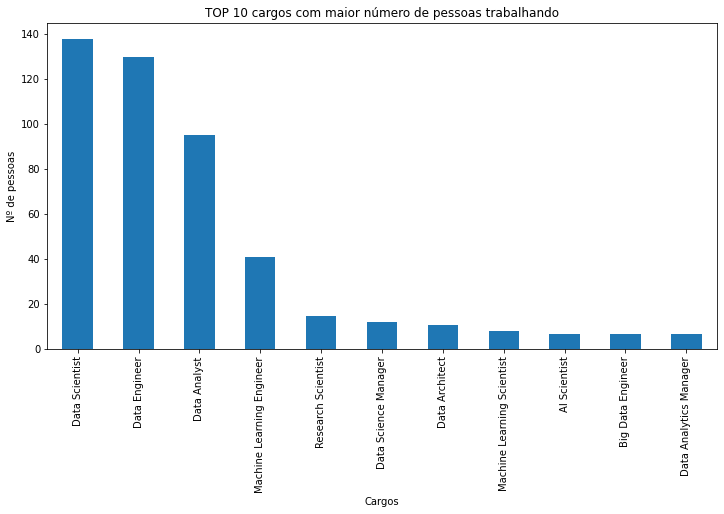

In [20]:
# tamanho do grafíco
plt.figure(figsize=(12, 6))

# titulo do gráfico
plt.title("TOP 10 cargos com maior número de pessoas trabalhando")

# Dados que vão para o gráfico
df_clean.groupby("job_title")["job_title"].count().sort_values(ascending=False)[0:11].plot(kind="bar", rot=90)

# Nome que vai para o eixo X
plt.xlabel("Cargos")

# Nome que vai para o eixo Y
plt.ylabel("Nº de pessoas")
plt.show()

# **Conclusão final**
Chegamos ao final de mais uma análise, vimos nesse dataset algumas informações referente aos salários de várias áreas que envolve diretamente dados.

Vale ressaltar que não podemos cravar que a área X paga melhor que a Y ou dizer que quem trabalha remoto é mais valorizado, pois para isso precisariamos primeiro avaliar se essa fonte de dados é realmente confiável, além de fazer validação dos dados batendo com outras fontes.

Quero com essa analise mostrar alguns pontos que **achei interessante nesse dataset:**
- Área de Engenheiro de dados ganhando acima da de Cientista.
- Pessoas que trabalham remotamente ganhando acima do presencial.
- Existem pessoas que fazem freelancer como Cientista de Dados e faturam alto.
